###### <center>**A Thesis Project Implementation By Jonaz Juan C. Sayson & Fabiola C. Villanueva**</center> 

# <center>**Overview**</center>

---

#### **1.1 Abstract**

Forecasting music genre popularity is increasingly important in the age of digital streaming, where data-driven strategies influence both content creation and distribution. This study explores how audio characteristics from Spotify tracks can be used to predict genre popularity trends and identify which musical features contribute most to listener engagement. Using a dataset of approximately 650 high-popularity songs released between 2008 and 2024, audio features were aggregated by genre and year to model broad genre trends.  Two models were implemented: ARIMA for forecasting temporal changes in genre popularity, and XGBoost for analyzing the predictive influence of audio features such as energy, tempo, and danceability. The models were validated using walk-forward and time-aware testing strategies to ensure reliability and reduce bias. Results indicate that genre popularity is forecastable within a one- to five-year horizon, and that specific audio features consistently drive popularity across genres. The system successfully predicts future trends and reveals genre-specific characteristics influencing popularity. Aligning creative output with evolving audience preferences, valuable insights are offered by these findings for artists, producers, and music analysts navigating the landscape of the music industry by providing a practical framework for understanding the intersection of musical structure and popularity in a streaming-driven music landscape.

#### **1.2 Objective**

This study aims to develop a system that models and forecasts the popularity of music genres using audio features from Spotify, applying XGBoost for feature impact analysis and ARIMA for time series forecasting.

In order to achieve the general objective of modeling genre popularity and identifying influential audio features, the study seeks to answer the following questions. 

  1. What audio features can be extracted and analyzed from Spotify’s historical dataset to model how the popularity of music genres have changed over time?
  2. What audio features most significantly influence genre popularity and what are their relative importance in shaping trends?.
  3. How can the forecasted outputs be interpreted to provide actionable insights for music producers, songwriters, and artists, enabling them to adapt their creative and technical decisions based on forecasted evolving music directions?

Conducting the study shall address these said objectives and its findings shall provide meaningful insights that will be able to empower and support industry professionals to make informed, strategic decisions in such a fluctuating industry.


In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **1.3 Importing and Viewing the Datasets**

The following code section displays the raw dataset as it is but only its first and last five rows of the data frame while displaying all 29 columns. Followed by displaying the preprocessed dataset the same way.
Having a total of 1686 rows by 29 columns.

In [5]:
# Loading the raw dataset
origDF = pd.read_csv('Dataset/high_popularity_spotify_data(orig).csv')
pd.set_option('display.max_columns', None)

print(f"{origDF.shape[0]} rows x {origDF.shape[1]} columns")
print("Spotify dataset before preprocessing:")
display(origDF.head())
display(origDF.tail())

1686 rows x 29 columns
Spotify dataset before preprocessing:


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,76,https://api.spotify.com/v1/tracks/26b3oVLrRUaa...,spotify:track:26b3oVLrRUaaybJulow9kz,People,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/26b3...,26b3oVLrRUaaybJulow9kz,People,2022-12-06,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.551,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,74,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,spotify:track:1wADwLSkYhrSmy4vdy6BRn,Boy Alone,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/1wAD...,1wADwLSkYhrSmy4vdy6BRn,soso,2022-07-14,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.424,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,69,https://api.spotify.com/v1/tracks/7vKXc90NT5WB...,spotify:track:7vKXc90NT5WBm3UTT4iTVG,Timeless,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/7vKX...,7vKXc90NT5WBm3UTT4iTVG,KANTE (feat. Fave),2023-03-30,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.182,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,82,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,spotify:track:59nOXPmaKlBfGMDeOVGrIK,I NEVER LIKED YOU,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/59nO...,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),2022-04-29,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.314,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1685,0.890,126.881,0.645,pop,-4.985,0.3760,0.421,"Alan Walker, Ina Wroldsen",4,0.1280,69,https://api.spotify.com/v1/tracks/2GE3k8I0Sbh0...,spotify:track:2GE3k8I0Sbh0puCjI15KGy,Barcelona,Scandi Pop,https://api.spotify.com/v1/audio-analysis/2GE3...,2GE3k8I0Sbh0puCjI15KGy,Barcelona,2024-06-13,0.000009,34yBJhr8zlBAHMEMSwrISN,1,6,205087,0.259,2GE3k8I0Sbh0puCjI15KGy,scandi,audio_features,59z06GgF6TTDbm5cr1RZUC


In [6]:
# Loading the preprocessed dataset
processedDF = pd.read_csv('Dataset/preprocessed_spotify_data.csv')
pd.set_option('display.max_columns', None)

print(f"{processedDF.shape[0]} rows x {processedDF.shape[1]} columns")
print("Spotify dataset after preprocessing:")
display(processedDF.head())
display(processedDF.tail())

1004 rows x 29 columns
Spotify dataset after preprocessing:


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.681,155.079,0.560,pop,-6.304,0.1060,0.388,"Omar Courtz, De La Rose",4,0.2440,89,https://api.spotify.com/v1/tracks/0Sr7ssScx54y...,spotify:track:0Sr7ssScx54yxdM2ols7nW,PRIMERA MUSA,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/0Sr7...,0Sr7ssScx54yxdM2ols7nW,Q U E V A S H A C E R H O Y ?,2024.0,0.000000,3C5uwdRE5QRoXSGPPxpDd4,0,6,223320,0.10300,0Sr7ssScx54yxdM2ols7nW,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.689,120.208,0.724,latin,-7.174,0.0922,0.936,Tito Double P,3,0.0524,89,https://api.spotify.com/v1/tracks/6X6m4xmdFcz3...,spotify:track:6X6m4xmdFcz31p1h7Qg68c,INCÓMODO,Viva Latino,https://api.spotify.com/v1/audio-analysis/6X6m...,6X6m4xmdFcz31p1h7Qg68c,EL LOKERON,2024.0,0.000007,27GWSFRITD8JJcSGMgEfTN,0,7,146141,0.57300,6X6m4xmdFcz31p1h7Qg68c,modern,audio_features,37i9dQZF1DX10zKzsJ2jva
2,0.604,159.920,0.561,pop,-4.409,0.1040,0.242,Teddy Swims,3,0.0337,89,https://api.spotify.com/v1/tracks/17phhZDn6oGt...,spotify:track:17phhZDn6oGtzMe56NuWvj,I've Tried Everything But Therapy (Part 1),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/17ph...,17phhZDn6oGtzMe56NuWvj,Lose Control,2023.0,0.000019,7nacKlk586eLRBSIsrk9DB,1,9,210689,0.19900,17phhZDn6oGtzMe56NuWvj,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.725,116.988,0.894,pop,-4.984,0.0815,0.838,JENNIE,4,0.0432,89,https://api.spotify.com/v1/tracks/2CspwnypzT7r...,spotify:track:2CspwnypzT7rcWI9RfsoSb,Mantra,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2Csp...,2CspwnypzT7rcWI9RfsoSb,Mantra,2024.0,0.000012,3e5tDT1kfaAGx10yOjIDgW,0,10,136627,0.00434,2CspwnypzT7rcWI9RfsoSb,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.698,143.994,0.726,pop,-4.165,0.3090,0.867,Bruno Mars,4,0.0431,89,https://api.spotify.com/v1/tracks/3w3y8KPTfNeO...,spotify:track:3w3y8KPTfNeOKPiqUTakBh,Unorthodox Jukebox,Global Top 50,https://api.spotify.com/v1/audio-analysis/3w3y...,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,2012.0,0.000000,58ufpQsJ1DS5kq4hhzQDiI,1,5,233478,0.04900,3w3y8KPTfNeOKPiqUTakBh,global,audio_features,37i9dQZEVXbMDoHDwVN2tF


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
999,0.0972,86.686,0.443,ambient,-16.496,0.1150,0.289,Leith Ross,4,0.0793,68,https://api.spotify.com/v1/tracks/4Do3s3aivnqb...,spotify:track:4Do3s3aivnqbUAvUEDEsAG,To Learn,Dark Academia,https://api.spotify.com/v1/audio-analysis/4Do3...,4Do3s3aivnqbUAvUEDEsAG,We'll Never Have Sex,2023.0,0.010200,5k6lsjpZK4l4J9oMQmBR1l,1,2,100716,0.9520,4Do3s3aivnqbUAvUEDEsAG,academic,audio_features,6JH5nqQdmdNPuwEoCImWnj
1000,0.4860,119.955,0.556,rock,-7.139,0.1640,0.243,Green Day,4,0.0329,68,https://api.spotify.com/v1/tracks/5TpPSTItCwtZ...,spotify:track:5TpPSTItCwtZ8Sltr3vdzm,21st Century Breakdown,Alternative Rock,https://api.spotify.com/v1/audio-analysis/5TpP...,5TpPSTItCwtZ8Sltr3vdzm,Last Night on Earth,2009.0,0.000001,1AHZd3C3S8m8fFrhFxyk79,1,2,236533,0.0371,5TpPSTItCwtZ8Sltr3vdzm,alternative,audio_features,4q2NzGlz5Nn6kB6Dh2vBKX
1001,0.8410,147.989,0.754,afrobeats,-4.563,0.0903,0.838,Rema,4,0.0921,68,https://api.spotify.com/v1/tracks/7ySC0IjVS1PM...,spotify:track:7ySC0IjVS1PMEdsZOvsUK2,HEIS,African Heat,https://api.spotify.com/v1/audio-analysis/7ySC...,7ySC0IjVS1PMEdsZOvsUK2,OZEBA,2024.0,0.000000,2DDaN7Pgx9uDPd8IbWWW9H,1,2,137684,0.1360,7ySC0IjVS1PMEdsZOvsUK2,african,audio_features,37i9dQZF1DWYkaDif7Ztbp
1002,0.6510,67.813,0.490,afrobeats,-6.259,0.1080,0.567,"Ayo Maff, Fireboy DML",5,0.1380,68,https://api.spotify.com/v1/tracks/5Wxkvvb6pLky...,spotify:track:5Wxkvvb6pLky16pwq4gBI3,Dealer,African Heat,https://api.spotify.com/v1/audio-analysis/5Wxk...,5Wxkvvb6pLky16pwq4gBI3,Dealer,2024.0,0.000008,3RShBBcnQmqfmBJgmfz3or,1,11,180594,0.7140,5Wxkvvb6pLky16pwq4gBI3,african,audio_features,37i9dQZF1DWYkaDif7Ztbp
1003,0.7050,197.980,0.374,afrobeats,-8.370,0.1400,0.718,"Hyce, BoyPee, Brown Joel",5,0.1450,68,https://api.spotify.com/v1/tracks/3MldGIMtPcup...,spotify:track:3MldGIMtPcupNBI4Dnxolr,Constantly,African Heat,https://api.spotify.com/v1/audio-analysis/3Mld...,3MldGIMtPcupNBI4Dnxolr,Constantly,2024.0,0.000000,6tqG51134jDxxuWMaEgn8O,1,11,193567,0.1720,3MldGIMtPcupNBI4Dnxolr,african,audio_features,37i9dQZF1DWYkaDif7Ztbp


#### **1.4 Visualizing Outliers From The Preprocessing Phase**

Note that **the copy of the data set shall be used onwards** in this repo, leaving the original dataset untouched. The following code snippet below visualizes a comparison before and after having identified the outliers by using the Inter Quartile Range method.

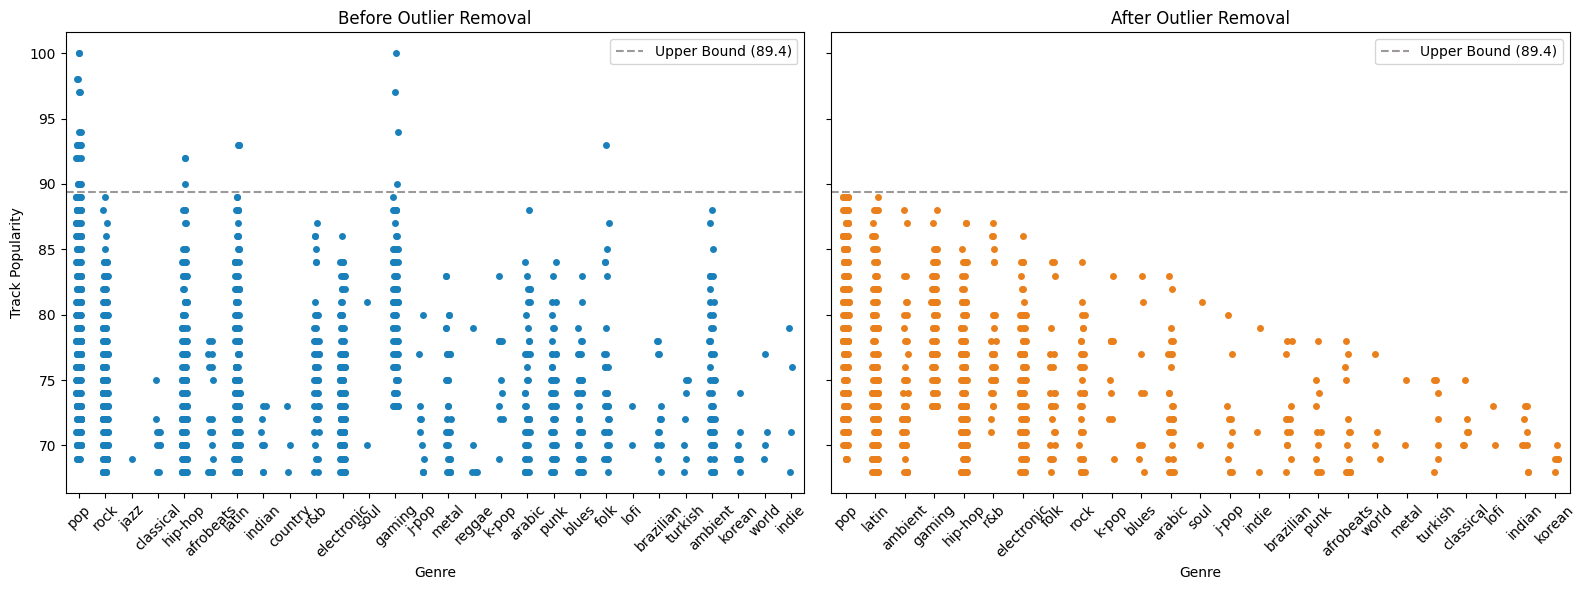

In [7]:
# Create side-by-side strip plots before and after preprocessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Strip plot before outlier removal
sns.stripplot(x='playlist_genre', y='track_popularity', data=origDF, jitter=True, size=5, color='#1a80bb', ax=ax1)
ax1.axhline(y=89.4, color='#9e9999', linestyle='--', label='Upper Bound (89.4)')
ax1.set_title('Before Outlier Removal')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Track Popularity')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Strip plot after outlier removal
sns.stripplot(x='playlist_genre', y='track_popularity', data=processedDF, jitter=True, size=5, color='#ea801c', ax=ax2)
ax2.axhline(y=89.4, color='#9e9999', linestyle='--', label='Upper Bound (89.4)')
ax2.set_title('After Outlier Removal')
ax2.set_xlabel('Genre')
ax2.set_ylabel('')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Diagrams/scatter_plot_genre_popularity.png', dpi=1000, bbox_inches='tight')
plt.show()


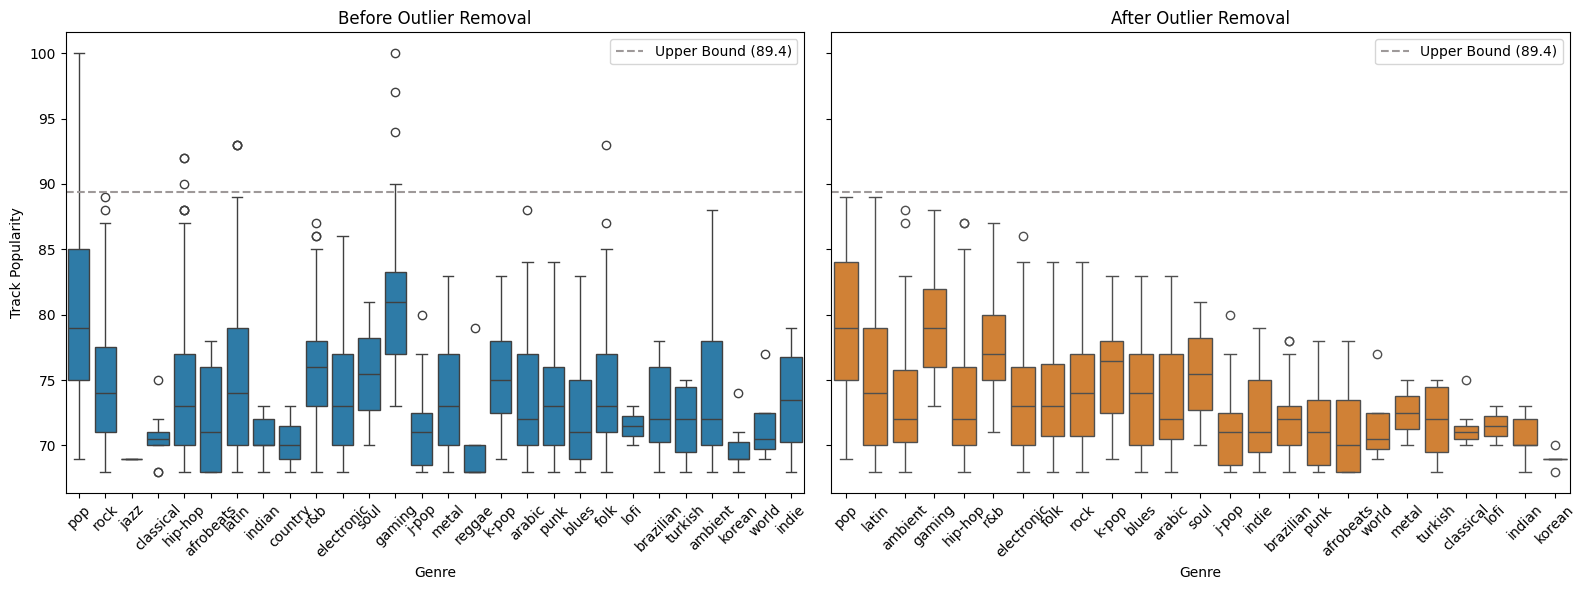

In [8]:
# Create side-by-side box plots before and after preprocessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Box plot before outlier removal
sns.boxplot(x='playlist_genre', y='track_popularity', data=origDF, color='#1a80bb', ax=ax1)
ax1.axhline(y=89.4, color='#9e9999', linestyle='--', label='Upper Bound (89.4)')
ax1.set_title('Before Outlier Removal')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Track Popularity')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Box plot after outlier removal
sns.boxplot(x='playlist_genre', y='track_popularity', data=processedDF, color='#ea801c', ax=ax2)
ax2.axhline(y=89.4, color='#9e9999', linestyle='--', label='Upper Bound (89.4)')
ax2.set_title('After Outlier Removal')
ax2.set_xlabel('Genre')
ax2.set_ylabel('')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Diagrams/box_plot_genre_popularity.png', dpi=1000, bbox_inches='tight')
plt.show()